## I. IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [5]:
dataset = pd.read_csv('appdata10.csv', on_bad_lines='skip')
dataset.head(8)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0


In [6]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## II. Data Expploration

In [7]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [8]:
dataset2 = dataset.copy().drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [9]:
dataset2.head(8)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
5,2,9,20,14,0,0,0
6,1,2,35,3,0,0,0
7,1,3,26,41,0,1,0


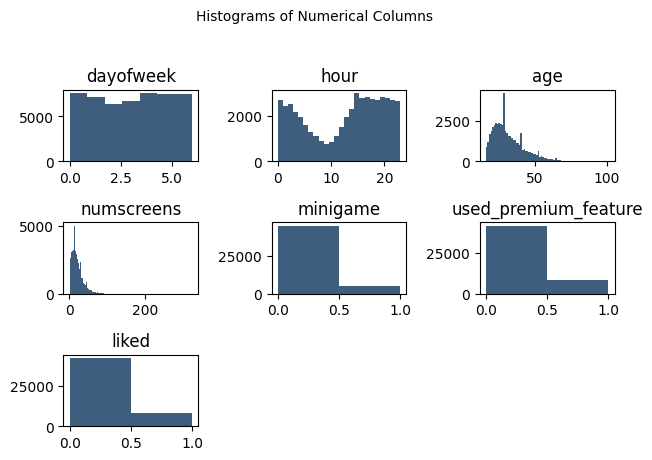

In [10]:
# Histogram
plt.suptitle('Histograms of Numerical Columns', fontsize=10)
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(3, 3, i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i - 1])
  vals = np.size(dataset2.iloc[:, i - 1].unique())
  plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])

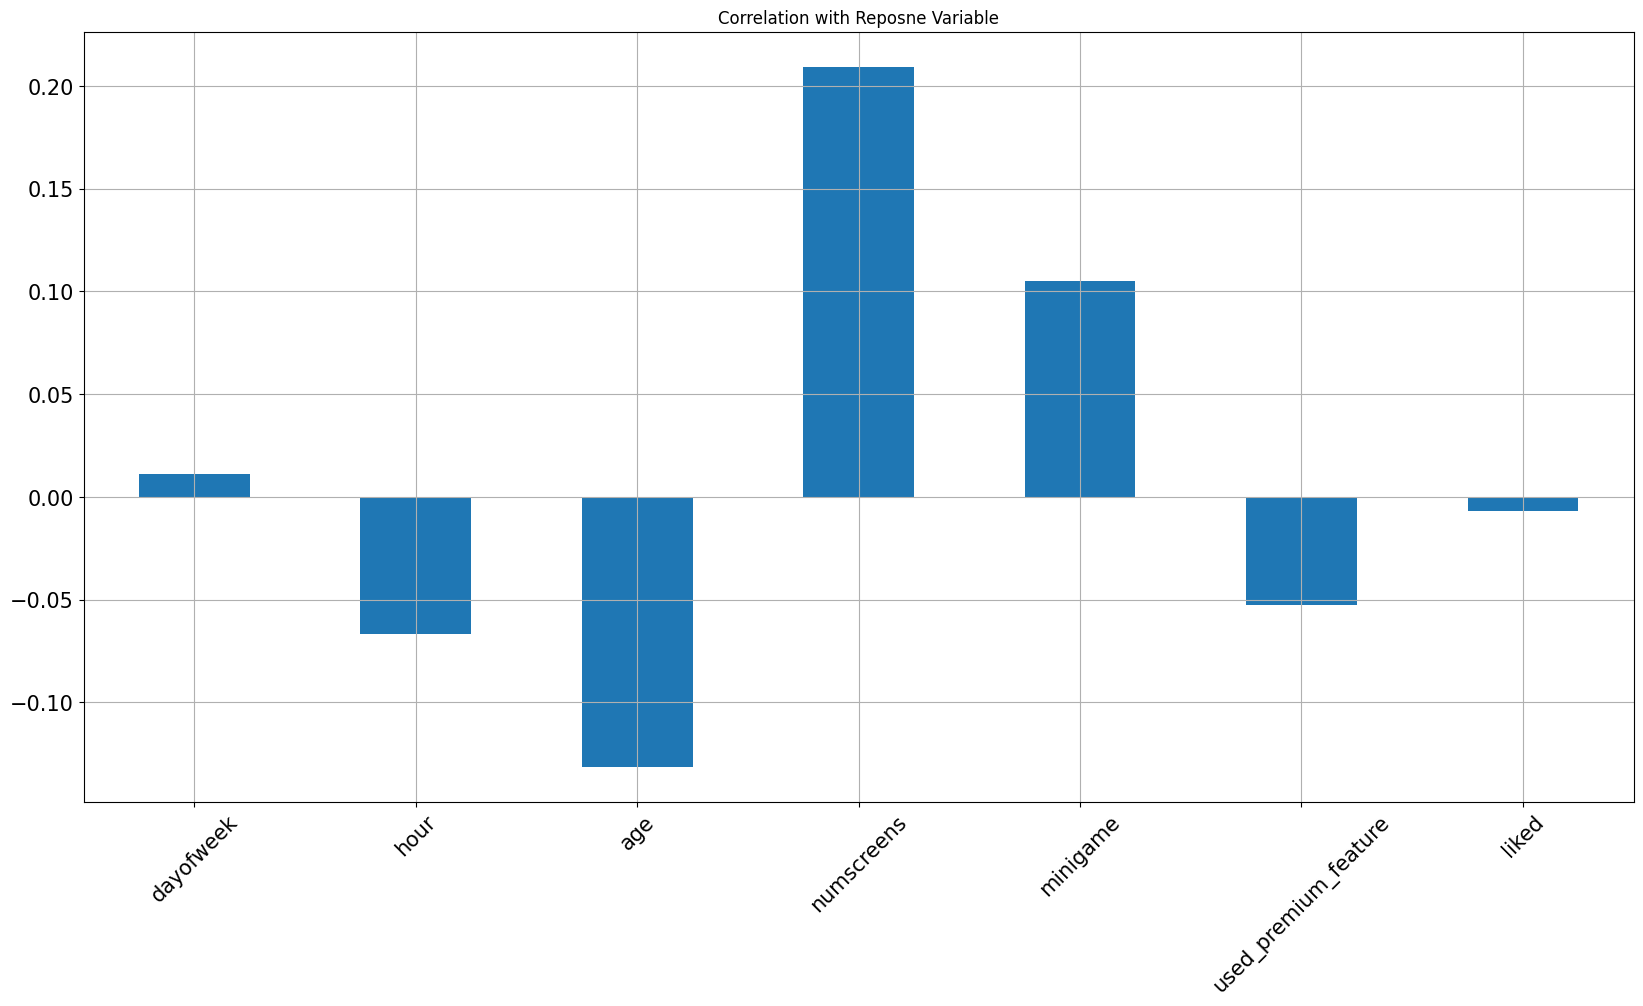

In [14]:
# Correlation with Response
dataset2.corrwith(dataset.enrolled).plot.bar(
  figsize = (20, 10), title = "Correlation with Reposne Variable",
  fontsize = 15, rot = 45, grid = True
)
plt.show()

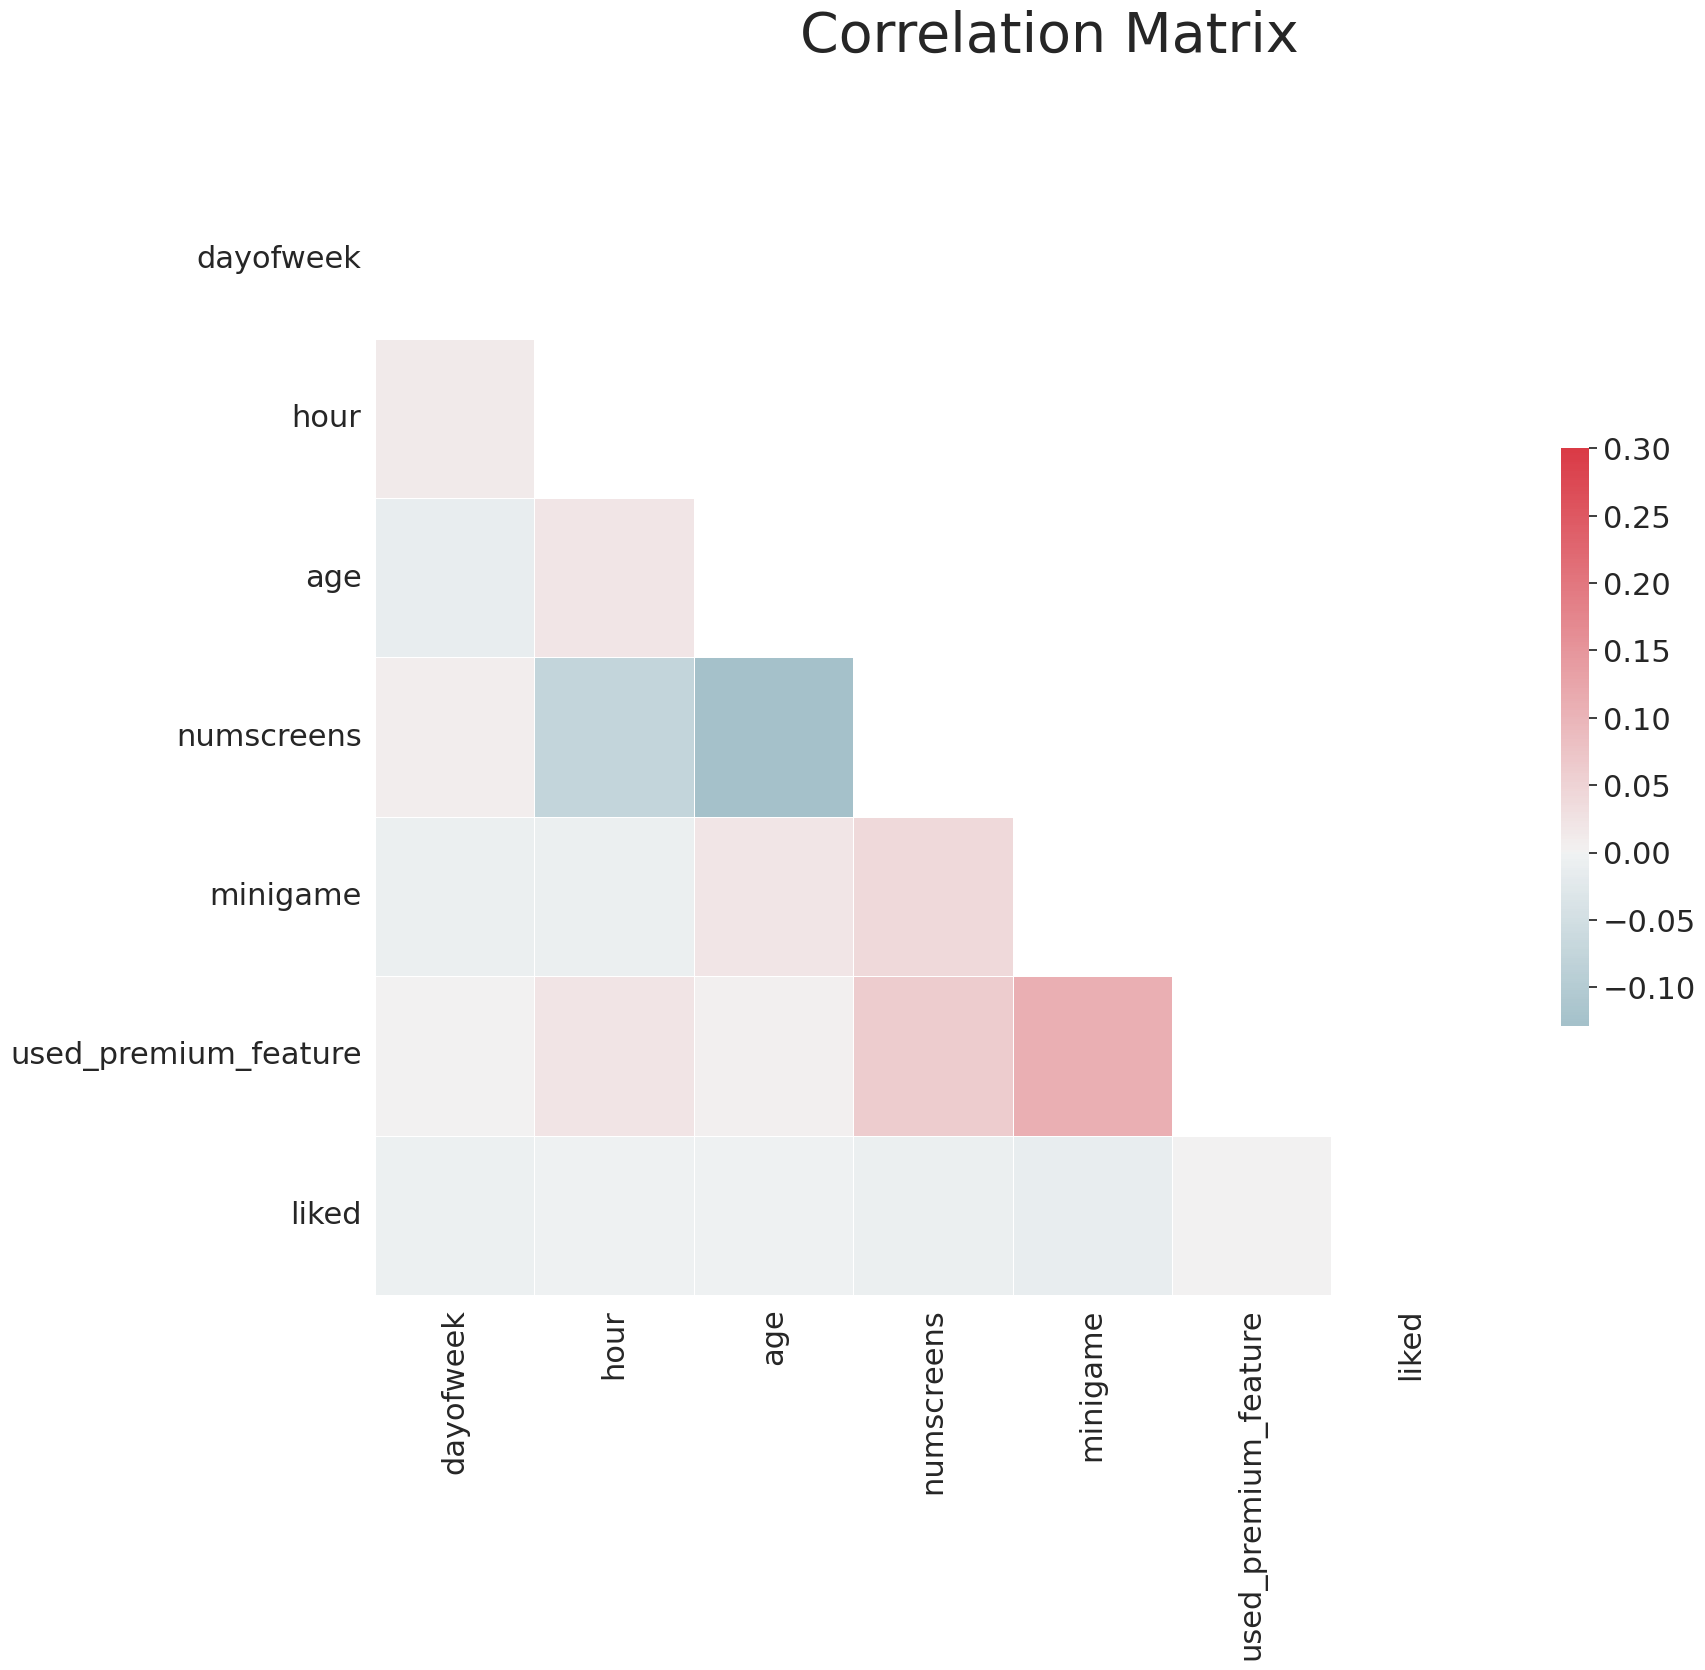

In [17]:
# Correlation Matrix
sns.set(style='white', font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle('Correlation Matrix', fontsize=40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [23]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [24]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [26]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).dt.total_seconds() / 3600


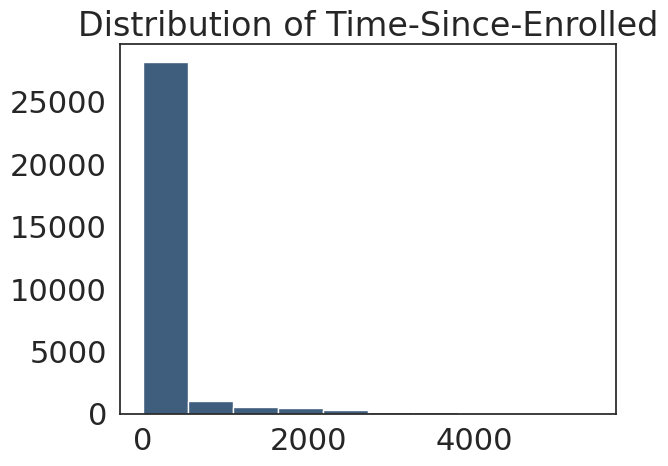

In [28]:
plt.hist(dataset.difference.dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

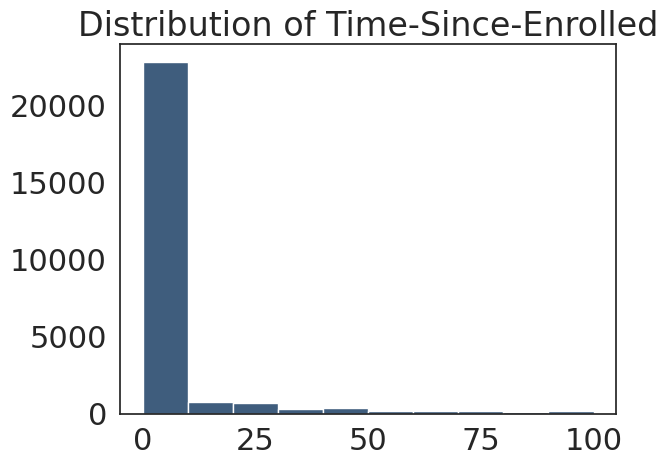

In [29]:
plt.hist(dataset.difference.dropna(), color='#3F5D7D', range=[0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [30]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['difference', 'enrolled_date', 'first_open'])

In [32]:
# Formatting the screen_list field

top_screen = pd.read_csv('top_screens.csv').top_screens.values

In [34]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [35]:
for sc in top_screen:
  dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
  dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

In [36]:
dataset['screen_list']

,screen_list
0,"joinscreen,product_review,ScanPreview,VerifyTo..."
1,"joinscreen,product_review,product_review2,Scan..."
2,
3,"product_review,Home,product_review,ReferralCon..."
4,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn..."
...,...
49995,"Home,ScanPreview,VerifySSN,product_review,prod..."
49996,"Home,"
49997,"joinscreen,product_review,product_review2,Scan..."
49998,"Home,product_review,product_review,product_rev..."


In [37]:
dataset['other'] = dataset.screen_list.str.count(",")

In [38]:
dataset = dataset.drop(columns=['screen_list'])

In [39]:
# Funnels
saving_screens = [
    'Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10'
]
dataset['SavingsCount'] = dataset[saving_screens].sum(axis=1)

In [40]:
dataset = dataset.drop(columns=saving_screens)

In [41]:
cm_screens = [
    'Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard'
]
dataset['CMCount'] = dataset[cm_screens].sum(axis=1)

In [42]:
cc_screens = [
    'CC1', 'CC1Category', 'CC3'
]
dataset['CCCount'] = dataset[cc_screens].sum(axis=1)

In [43]:
loan_screens = [
    "Loan", "Loan2", "Loan3", "Loan4"
]
dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)

In [45]:
dataset = dataset.drop(columns=cm_screens + cc_screens + loan_screens)

In [46]:
dataset.head(8)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
5,56480,2,9,20,14,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,1
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,249366,1,3,26,41,0,1,0,0,0,...,0,0,1,0,0,8,0,2,0,1


In [47]:
dataset.to_csv('cleaned_data.csv', index=False)